In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Lufthansa/Lufthansa(SKG_AMS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,15:35:00,22:10:00,1,2,1,1,0,110,391.47
1,15:35:00,08:15:00,1,2,1,1,1,220,404.17
2,17:30:00,22:25:00,1,2,1,1,0,110,443.98
3,15:35:00,22:25:00,1,2,1,2,0,222,505.36
4,08:15:00,18:30:00,1,2,2,2,0,444,937.36


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 9 columns):
departure_time      4218 non-null object
arrival_time        4218 non-null object
days_before         4218 non-null int64
day_of_week         4218 non-null int64
num_of_luggage      4218 non-null int64
num_of_stops        4218 non-null int64
overnight_flight    4218 non-null int64
Class               4218 non-null int64
price               4218 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 296.7+ KB


In [7]:
df.shape

(4218, 9)

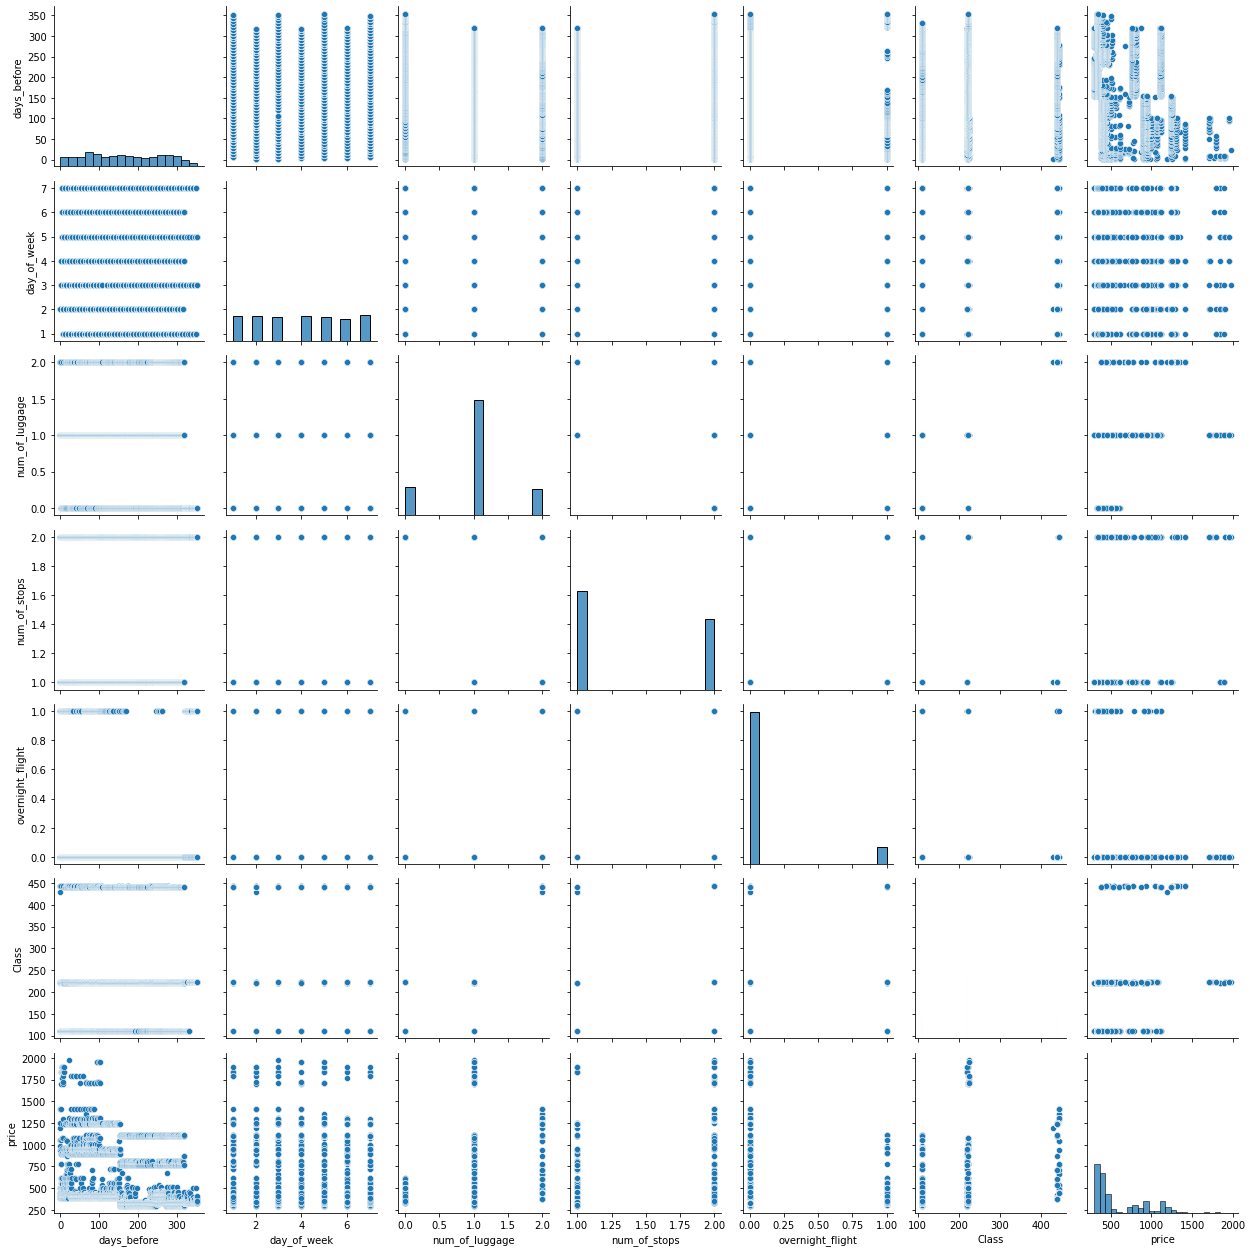

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 15:35:00,1900-01-01 22:10:00,1,2,1,1,0,110,391.47
1,1900-01-01 15:35:00,1900-01-01 08:15:00,1,2,1,1,1,220,404.17
2,1900-01-01 17:30:00,1900-01-01 22:25:00,1,2,1,1,0,110,443.98
3,1900-01-01 15:35:00,1900-01-01 22:25:00,1,2,1,2,0,222,505.36
4,1900-01-01 08:15:00,1900-01-01 18:30:00,1,2,2,2,0,444,937.36


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 15:35:00,1900-01-01 22:10:00,1,2,1,1,0,110,391.47,-2208932700000000000,-2208909000000000000
1,1900-01-01 15:35:00,1900-01-01 08:15:00,1,2,1,1,1,220,404.17,-2208932700000000000,-2208959100000000000
2,1900-01-01 17:30:00,1900-01-01 22:25:00,1,2,1,1,0,110,443.98,-2208925800000000000,-2208908100000000000
3,1900-01-01 15:35:00,1900-01-01 22:25:00,1,2,1,2,0,222,505.36,-2208932700000000000,-2208908100000000000
4,1900-01-01 08:15:00,1900-01-01 18:30:00,1,2,2,2,0,444,937.36,-2208959100000000000,-2208922200000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,2,1,1,1,0,110,391.47
1,2,1,1,1,1,220,404.17
2,2,1,1,1,0,110,443.98
3,2,1,1,2,0,222,505.36
4,2,1,2,2,0,444,937.36


In [21]:
df.to_csv('skg_ams_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [3]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5240113559027999


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7322540154148347


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7317536493083564


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.735747012432199


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5565446770461229


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7357450657082854


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.157585217433715


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4693442255317656


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
106/106 [==============================] - 5s 5ms/step - loss: 138008.6406 - val_loss: 44555.4531
Epoch 2/200
106/106 [==============================] - 0s 3ms/step - loss: 93847.7266 - val_loss: 40841.1797
Epoch 3/200
106/106 [==============================] - 0s 3ms/step - loss: 93179.4219 - val_loss: 46358.8164
Epoch 4/200
106/106 [==============================] - 0s 4ms/step - loss: 88826.2812 - val_loss: 40535.3359
Epoch 5/200
106/106 [==============================] - 0s 4ms/step - loss: 83791.1719 - val_loss: 45631.3945
Epoch 6/200
106/106 [==============================] - 0s 4ms/step - loss: 80984.9688 - val_loss: 48138.8281
Epoch 7/200
106/106 [==============================] - 0s 4ms/step - loss: 78097.4609 - val_loss: 48502.7852
Epoch 8/200
106/106 [==============================] - 0s 4ms/step - loss: 77298.5547 - val_loss: 44905.5078
Epoch 9/200
106/106 [==============================] - 0s 4ms/step - loss: 74659.7969 - val_loss: 45664.1914
Epoch 10/200
106/1

106/106 [==============================] - 0s 4ms/step - loss: 50800.8359 - val_loss: 57082.7734
Epoch 150/200
106/106 [==============================] - 0s 4ms/step - loss: 50348.8477 - val_loss: 58626.9727
Epoch 151/200
106/106 [==============================] - 0s 4ms/step - loss: 51060.1641 - val_loss: 50344.4531
Epoch 152/200
106/106 [==============================] - 0s 4ms/step - loss: 50350.8477 - val_loss: 50855.3867
Epoch 153/200
106/106 [==============================] - 0s 4ms/step - loss: 51055.9961 - val_loss: 58774.8711
Epoch 154/200
106/106 [==============================] - 0s 4ms/step - loss: 50321.7656 - val_loss: 46061.4531
Epoch 155/200
106/106 [==============================] - 0s 4ms/step - loss: 50980.0078 - val_loss: 66771.9453
Epoch 156/200
106/106 [==============================] - 0s 4ms/step - loss: 50476.5195 - val_loss: 61558.1289
Epoch 157/200
106/106 [==============================] - 0s 4ms/step - loss: 50823.0234 - val_loss: 49836.7734
Epoch 158/200
1

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.5556905480197403


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
106/106 [==============================] - 1s 6ms/step - loss: 165235.3594 - val_loss: 39691.1914
Epoch 2/200
106/106 [==============================] - 0s 4ms/step - loss: 93594.6250 - val_loss: 42804.2930
Epoch 3/200
106/106 [==============================] - 0s 4ms/step - loss: 95247.2812 - val_loss: 42352.5156
Epoch 4/200
106/106 [==============================] - 0s 4ms/step - loss: 93751.8125 - val_loss: 37975.7695
Epoch 5/200
106/106 [==============================] - 0s 4ms/step - loss: 91544.9219 - val_loss: 41682.2383
Epoch 6/200
106/106 [==============================] - 0s 4ms/step - loss: 92797.6406 - val_loss: 43746.5352
Epoch 7/200
106/106 [==============================] - 0s 4ms/step - loss: 88841.8906 - val_loss: 39490.7852
Epoch 8/200
106/106 [==============================] - 0s 4ms/step - loss: 86435.2031 - val_loss: 44162.0742
Epoch 9/200
106/106 [==============================] - 0s 4ms/step - loss: 80631.6641 - val_loss: 43725.9062
Epoch 10/200
106/1

Epoch 149/200
106/106 [==============================] - 0s 4ms/step - loss: 54128.7500 - val_loss: 68821.6250
Epoch 150/200
106/106 [==============================] - 0s 4ms/step - loss: 53577.8320 - val_loss: 65326.1367
Epoch 151/200
106/106 [==============================] - 0s 4ms/step - loss: 52627.1016 - val_loss: 65415.0820
Epoch 152/200
106/106 [==============================] - 0s 4ms/step - loss: 53646.6523 - val_loss: 64284.3164
Epoch 153/200
106/106 [==============================] - 0s 4ms/step - loss: 52763.1992 - val_loss: 69397.6094
Epoch 154/200
106/106 [==============================] - 0s 4ms/step - loss: 53593.1094 - val_loss: 70734.6094
Epoch 155/200
106/106 [==============================] - 0s 4ms/step - loss: 53235.5938 - val_loss: 67256.0391
Epoch 156/200
106/106 [==============================] - 0s 4ms/step - loss: 52995.1641 - val_loss: 58549.5156
Epoch 157/200
106/106 [==============================] - 0s 4ms/step - loss: 52287.2617 - val_loss: 76816.6094
E

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.5404692375690889


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
106/106 [==============================] - 1s 5ms/step - loss: 143994.5156 - val_loss: 39129.0977
Epoch 2/200
106/106 [==============================] - 0s 4ms/step - loss: 94228.2266 - val_loss: 38627.7812
Epoch 3/200
106/106 [==============================] - 0s 4ms/step - loss: 93019.8828 - val_loss: 37864.9844
Epoch 4/200
106/106 [==============================] - 0s 4ms/step - loss: 94564.4297 - val_loss: 39240.2930
Epoch 5/200
106/106 [==============================] - 0s 4ms/step - loss: 91667.9141 - val_loss: 48262.0898
Epoch 6/200
106/106 [==============================] - 0s 4ms/step - loss: 90747.2500 - val_loss: 38397.8867
Epoch 7/200
106/106 [==============================] - 0s 4ms/step - loss: 89402.6406 - val_loss: 47221.7852
Epoch 8/200
106/106 [==============================] - 0s 4ms/step - loss: 86117.4844 - val_loss: 41340.3828
Epoch 9/200
106/106 [==============================] - 0s 4ms/step - loss: 82214.1641 - val_loss: 42800.9609
Epoch 10/200
106/1

106/106 [==============================] - 0s 4ms/step - loss: 52555.8516 - val_loss: 53071.2617
Epoch 150/200
106/106 [==============================] - 0s 4ms/step - loss: 52222.7344 - val_loss: 62741.0195
Epoch 151/200
106/106 [==============================] - 0s 4ms/step - loss: 52335.2695 - val_loss: 59478.4258
Epoch 152/200
106/106 [==============================] - 0s 4ms/step - loss: 51943.5195 - val_loss: 61966.8438
Epoch 153/200
106/106 [==============================] - 0s 4ms/step - loss: 52187.0977 - val_loss: 55179.7578
Epoch 154/200
106/106 [==============================] - 0s 4ms/step - loss: 52954.9648 - val_loss: 49564.5742
Epoch 155/200
106/106 [==============================] - 0s 4ms/step - loss: 53805.2305 - val_loss: 57677.3555
Epoch 156/200
106/106 [==============================] - 0s 4ms/step - loss: 51230.5156 - val_loss: 52541.3086
Epoch 157/200
106/106 [==============================] - 0s 4ms/step - loss: 52821.7695 - val_loss: 55048.7383
Epoch 158/200
1

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
106/106 [==============================] - 1s 6ms/step - loss: 123762.5156 - val_loss: 38733.5977
Epoch 2/200
106/106 [==============================] - 0s 4ms/step - loss: 94770.4688 - val_loss: 41064.1055
Epoch 3/200
106/106 [==============================] - 0s 4ms/step - loss: 91281.2969 - val_loss: 38189.5352
Epoch 4/200
106/106 [==============================] - 0s 4ms/step - loss: 94186.1016 - val_loss: 39726.0312
Epoch 5/200
106/106 [==============================] - 0s 4ms/step - loss: 85911.8828 - val_loss: 51026.5156
Epoch 6/200
106/106 [==============================] - 0s 4ms/step - loss: 82612.4375 - val_loss: 39935.0664
Epoch 7/200
106/106 [==============================] - 0s 4ms/step - loss: 77037.4453 - val_loss: 41283.1562
Epoch 8/200
106/106 [==============================] - 0s 4ms/step - loss: 74985.5312 - val_loss: 55481.0078
Epoch 9/200
106/106 [==============================] - 0s 4ms/step - loss: 76403.7188 - val_loss: 50196.7773
Epoch 10/200
106/1

106/106 [==============================] - 0s 4ms/step - loss: 50091.7539 - val_loss: 52354.3789
Epoch 150/200
106/106 [==============================] - 0s 4ms/step - loss: 50046.9766 - val_loss: 51665.2500
Epoch 151/200
106/106 [==============================] - 0s 4ms/step - loss: 48759.3359 - val_loss: 56108.5352
Epoch 152/200
106/106 [==============================] - 0s 4ms/step - loss: 49300.0508 - val_loss: 62745.2656
Epoch 153/200
106/106 [==============================] - 0s 4ms/step - loss: 49248.9609 - val_loss: 71320.6484
Epoch 154/200
106/106 [==============================] - 0s 4ms/step - loss: 49254.2656 - val_loss: 60125.2617
Epoch 155/200
106/106 [==============================] - 0s 4ms/step - loss: 49294.2969 - val_loss: 56829.4609
Epoch 156/200
106/106 [==============================] - 0s 4ms/step - loss: 48913.3047 - val_loss: 62126.3828
Epoch 157/200
106/106 [==============================] - 0s 4ms/step - loss: 50025.8828 - val_loss: 57724.1484
Epoch 158/200
1

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
106/106 [==============================] - 1s 6ms/step - loss: 176547.3594 - val_loss: 40776.0312
Epoch 2/200
106/106 [==============================] - 0s 5ms/step - loss: 93444.5469 - val_loss: 42618.2891
Epoch 3/200
106/106 [==============================] - 0s 4ms/step - loss: 92834.4922 - val_loss: 37070.7344
Epoch 4/200
106/106 [==============================] - 0s 4ms/step - loss: 91534.8906 - val_loss: 49076.5820
Epoch 5/200
106/106 [==============================] - 0s 4ms/step - loss: 88934.7812 - val_loss: 39824.5547
Epoch 6/200
106/106 [==============================] - 0s 4ms/step - loss: 89497.9219 - val_loss: 39880.7031
Epoch 7/200
106/106 [==============================] - 0s 4ms/step - loss: 85452.6797 - val_loss: 40741.9805
Epoch 8/200
106/106 [==============================] - 0s 4ms/step - loss: 83232.0938 - val_loss: 42771.2969
Epoch 9/200
106/106 [==============================] - 0s 4ms/step - loss: 80915.6406 - val_loss: 51313.0586
Epoch 10/200
106/1

106/106 [==============================] - 0s 4ms/step - loss: 57905.0234 - val_loss: 63569.5938
Epoch 150/200
106/106 [==============================] - 0s 4ms/step - loss: 57773.1602 - val_loss: 71958.0703
Epoch 151/200
106/106 [==============================] - 0s 4ms/step - loss: 58023.0898 - val_loss: 77518.4062
Epoch 152/200
106/106 [==============================] - 0s 4ms/step - loss: 58216.8789 - val_loss: 61151.0312
Epoch 153/200
106/106 [==============================] - 0s 4ms/step - loss: 58432.9688 - val_loss: 69697.8984
Epoch 154/200
106/106 [==============================] - 0s 4ms/step - loss: 59173.0820 - val_loss: 65089.8438
Epoch 155/200
106/106 [==============================] - 0s 4ms/step - loss: 57925.7188 - val_loss: 71917.5938
Epoch 156/200
106/106 [==============================] - 0s 4ms/step - loss: 57802.2188 - val_loss: 69802.5234
Epoch 157/200
106/106 [==============================] - 0s 4ms/step - loss: 57629.8594 - val_loss: 64951.9766
Epoch 158/200
1

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
106/106 [==============================] - 1s 8ms/step - loss: 112565.5000 - val_loss: 43641.1914
Epoch 2/200
106/106 [==============================] - 1s 5ms/step - loss: 95615.4219 - val_loss: 83758.5469
Epoch 3/200
106/106 [==============================] - 0s 4ms/step - loss: 93268.9922 - val_loss: 41701.1094
Epoch 4/200
106/106 [==============================] - 0s 4ms/step - loss: 88657.4531 - val_loss: 55785.3594
Epoch 5/200
106/106 [==============================] - 0s 4ms/step - loss: 82376.3438 - val_loss: 53614.3320
Epoch 6/200
106/106 [==============================] - 0s 4ms/step - loss: 79239.1016 - val_loss: 42931.1523
Epoch 7/200
106/106 [==============================] - 0s 4ms/step - loss: 81566.6406 - val_loss: 41260.8164
Epoch 8/200
106/106 [==============================] - 0s 5ms/step - loss: 77891.7344 - val_loss: 42752.7812
Epoch 9/200
106/106 [==============================] - 0s 5ms/step - loss: 72237.0625 - val_loss: 50106.2695
Epoch 10/200
106/1

106/106 [==============================] - 0s 4ms/step - loss: 49399.3047 - val_loss: 75849.8750
Epoch 150/200
106/106 [==============================] - 0s 4ms/step - loss: 49653.1133 - val_loss: 53106.5312
Epoch 151/200
106/106 [==============================] - 1s 5ms/step - loss: 50567.0469 - val_loss: 69997.8672
Epoch 152/200
106/106 [==============================] - 0s 4ms/step - loss: 49061.5625 - val_loss: 51166.9258
Epoch 153/200
106/106 [==============================] - 0s 4ms/step - loss: 49600.7031 - val_loss: 55280.3828
Epoch 154/200
106/106 [==============================] - 0s 4ms/step - loss: 49275.0078 - val_loss: 62286.4297
Epoch 155/200
106/106 [==============================] - 0s 4ms/step - loss: 49494.8047 - val_loss: 79243.2891
Epoch 156/200
106/106 [==============================] - 0s 5ms/step - loss: 49098.3711 - val_loss: 73959.0781
Epoch 157/200
106/106 [==============================] - 1s 5ms/step - loss: 49420.7461 - val_loss: 71350.3906
Epoch 158/200
1

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.524
1,Bagging,0.732
2,Gradient Boosting,0.731
3,Decision Tree,0.736
4,Random Forest,0.556
5,Extra Tree,0.736
6,SVR,0.157
7,MLP,0.469
8,VGG11,0.555
9,VGG13,0.540


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

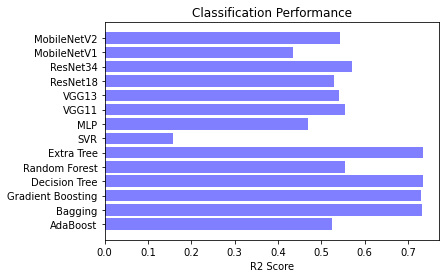

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()